In [18]:
import numpy as np
import pytraj as pyt
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Cargamos la estructura cristalográfica
cristal_strc = pyt.load(filename = './1L2Y/5-traj_analysis/1l2y_Hs.pdb',
                  top = './1L2Y/5-traj_analysis/1l2y_Hs.psf')
cristal_strc

pytraj.Trajectory, 1 frames: 
Size: 0.000007 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [20]:
# Visualizamos la estructura cristalográfica
import nglview as nv
import warnings
cristal_strc_view = nv.show_pytraj(cristal_strc)
cristal_strc_view.add_surface('.CA', opacity = 0.5)
cristal_strc_view

NGLWidget()

In [21]:
# Cargamos la restructura inicial, es decir, la estructura lineal del péptido
lineal_strc = pyt.load(filename = './1L2Y/1-topologia/tc5b.pdb',
                  top = './1L2Y/1-topologia/tc5b.psf')
lineal_strc

pytraj.Trajectory, 1 frames: 
Size: 0.000007 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [22]:
# Cargamos la trayectoria completa
f_topology = './1L2Y/4-run_dm_2/tc5b_wb.psf'
top_psf = pyt.load_topology(f_topology)
top_prot_psf = top_psf[':1-20']

In [23]:
# Para optimizar el análisis, previamente se han extraido de las trayectorias
# únicamente los átomos correspondientes a la proteína y guardado en la carpeta
# 5_traj_analysis

# Un ejemplo de cómo realizar dicha extracción es el siguiente:
_min = pyt.load(filename = './1L2Y/4-run_dm_2/1_min/tc5b_wb_min.dcd', 
                top = './1L2Y/4-run_dm_2/tc5b_wb.psf')
print(_min)
# Ahora guardamos un nuevo archivo de trayectoria:
pyt.write_traj(filename = './1L2Y/5-traj_analysis/tc5b_PROT_MIN.dcd', 
               traj = _min[':1-20'], 
               overwrite=True)
print(F'Archivo guardado:\n{_min[":1-20"]}')

pytraj.Trajectory, 1 frames: 
Size: 0.000422 (GB)
<Topology: 18869 atoms, 6209 residues, 6190 mols, non-PBC>
           
Archivo guardado:
pytraj.Trajectory, 1 frames: 
Size: 0.000007 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           


In [24]:
# PDB inicial
f_inicial = './1L2Y/2-solvatar_wt/tc5b_wb.pdb'
# Archivos de dinámica
dir_traj = './1L2Y/5-traj_analysis' # Directorio de los archivos
f_min = F'{dir_traj}/tc5b_PROT_MIN.dcd'
f_heat = F'{dir_traj}/tc5b_PROT_SA.dcd'
f_eq = F'{dir_traj}/tc5b_PROT_EQ.dcd'
f_prod = F'{dir_traj}/tc5b_PROT_PROD.dcd'

In [25]:
#Estructura inicial
init_struc = pyt.load(filename = f_inicial, top = top_psf, mask = ':1-20')
print( F'Estructura inicial: {init_struc.n_frames} frames')

# Minimización
min_traj = pyt.load(filename = f_min, top = top_prot_psf, mask = ':1-20')
print( F'Minimización: {min_traj.n_frames} frames')
# Calentamiento
heat_traj = pyt.load(filename = f_heat, top = top_prot_psf, mask = ':1-20')
print( F'Calentamiento: {heat_traj.n_frames} frames')
# Equilibrado
eq_traj = pyt.load(filename = f_eq, top = top_prot_psf, mask = ':1-20')
print( F'Equilibrado: {eq_traj.n_frames} frames')
# Producción
prod_traj = pyt.load(filename = f_prod, top = top_prot_psf)
print(F'Producción: {prod_traj.n_frames} frames')

Estructura inicial: 1 frames
Minimización: 1 frames
Calentamiento: 96 frames
Equilibrado: 250 frames
Producción: 5000 frames


In [26]:
# Combinamos todas las etapas para visualizar una única trayectoria
trajs_list = [min_traj, heat_traj, eq_traj, prod_traj]

In [27]:
# Número total de frames
n_frames_list = [ traj.n_frames for traj in trajs_list ]
n_full_frames = sum(n_frames_list)
print( F'Número total de frames: {n_full_frames}')

Número total de frames: 5347


In [28]:
# Inicializamos la trayectoria con una copia de la estructura inicial, 
# que es un objeto de la clase Trajectory de pytraj
full_traj = init_struc.copy()

# Iteramos sobre la lista de trayecorias, añadiendo las coordenadas
# al objeto full_traj
for traj in trajs_list:
    full_traj.append_xyz(traj.xyz)

full_traj

pytraj.Trajectory, 5348 frames: 
Size: 0.036339 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [29]:
# Podemos guardar el archivo para trabajar con él en el futuro
name_file_full_traj = F'{dir_traj}/tc5b_PROT_FULL_TRAJ.dcd'
pyt.write_traj(filename = name_file_full_traj, 
               traj = full_traj, overwrite = True)

In [30]:
# Ahora podemos visualizar la trayectoria total
full_traj_view = nv.show_pytraj(full_traj)
full_traj_view

NGLWidget(max_frame=5347)

In [31]:
# Superposición de los frames
full_traj.superpose(mask = ':6-15@CA')
full_traj_sup_view = nv.show_pytraj(full_traj)
full_traj_sup_view.add_representation("licorice")
full_traj_sup_view

NGLWidget(max_frame=5347)

In [32]:
# ¿Cómo saber todos los atributos y métodos que tiene un objeto en python?
# En este caso, para un objeto trayectoria
print(type( full_traj ))
print(dir( full_traj ))

<class 'pytraj.trajectory.trajectory.Trajectory'>
['__add__', '__call__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allocate', '_append_unitcells', '_boxes', '_estimated_GB', '_frame_holder', '_handle_setting_box_force_velocity', '_iterframe_indices', '_life_holder', '_top', '_xyz', 'align_principal_axis', 'append', 'append_xyz', 'autoimage', 'center', 'copy', 'forces', 'from_iterable', 'iterframe', 'load', 'n_atoms', 'n_frames', 'rmsfit', 'rotate', 'save', 'scale', 'shape', 'strip', 'superpose', 'time', 'top', 'topology', 'transform', 'translate', 'unitcells', 'velocities', 'view', 'visualize', 'xyz']


In [33]:
# Cálculo del RMSD de la trayectoria total
# tomando como referencia la estructura inicial (lineal)
rmsd_full_REF_lineal = pyt.rmsd( traj = full_traj, 
                                mask = ':3-18,@CA', 
                                ref = init_struc)

rmsd_full_REF_cristal = pyt.rmsd( traj = full_traj, 
                                mask = ':3-18,@CA', 
                                ref = cristal_strc)

In [34]:
# Importamos las librerías y parámetros para generar las gráficas
from  matplotlib import pyplot as plt
import seaborn as sns
sns.set( context = 'talk', style = 'ticks', palette = "Spectral")
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 5)

Populating the interactive namespace from numpy and matplotlib


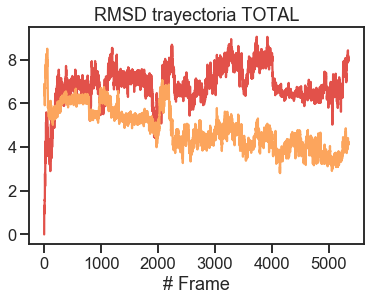

In [35]:
# Creamos la figura del RMSD
plt.plot( rmsd_full_REF_lineal )
plt.plot( rmsd_full_REF_cristal )
plt.title("RMSD trayectoria TOTAL")
plt.xlabel("# Frame")
plt.show()

In [36]:
# Cálculo del RMSD de la trayectoria total
# tomando como referencia la estructura inicial (lineal)
rmsd_prod_REF_lineal = pyt.rmsd( traj = prod_traj, 
                                mask = ':3-18,@CA', 
                                ref = init_struc)

rmsd_prod_REF_cristal = pyt.rmsd( traj = prod_traj, 
                                mask = ':3-18,@CA', 
                                ref = cristal_strc)

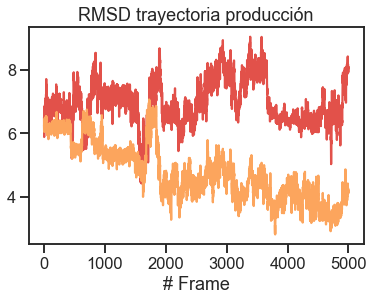

In [37]:
# Creamos la figura del RMSD
plt.plot( rmsd_prod_REF_lineal )
plt.plot( rmsd_prod_REF_cristal )
plt.title("RMSD trayectoria producción")
plt.xlabel("# Frame")
plt.show()

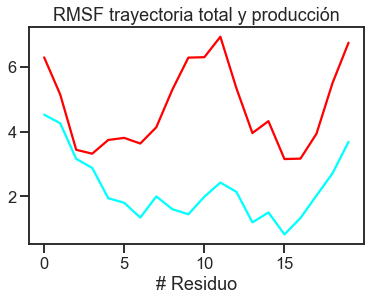

In [38]:
# Cálculo del RMSF TOTAL
full_traj.rmsfit(ref = cristal_strc)
rmsf_full_traj = pyt.rmsf(full_traj, mask = '@CA')
# Ahora comparamos con el RMSF de los últimos 1000 frames de la producción
rmsf_prod_traj = pyt.rmsf( prod_traj[-1000:], mask = '@CA' )

plt.plot( rmsf_full_traj.T[1], c = 'red')
plt.plot( rmsf_prod_traj.T[1], c = 'cyan')
#plt.plot( rmsf_prod_traj_3.T[1], c = 'blue')
plt.title("RMSF trayectoria total y producción")
plt.xlabel("# Residuo")
plt.show()

In [39]:
# Análisis de Componentes principales usando toda la trayectoria
traj_plus_cristal = full_traj.copy()
traj_plus_cristal.append_xyz(cristal_strc.xyz) 
# El último frame es la estructura del cristal
traj_plus_cristal.rmsfit( ref = cristal_strc)

pytraj.Trajectory, 5349 frames: 
Size: 0.036346 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [40]:
# Realización del PCA
pca_data = pyt.pca(traj_plus_cristal, mask=':3-18@CA', n_vecs = 5)
pca_projection = pca_data[0]

In [41]:
print('eigvenvalores de los primeros PCs', pca_data[1][0])

eigvenvalores de los primeros PCs [152.66497651  37.1090415   20.6668541   15.69702957   8.76174348]


Text(0, 0.5, 'PC2')

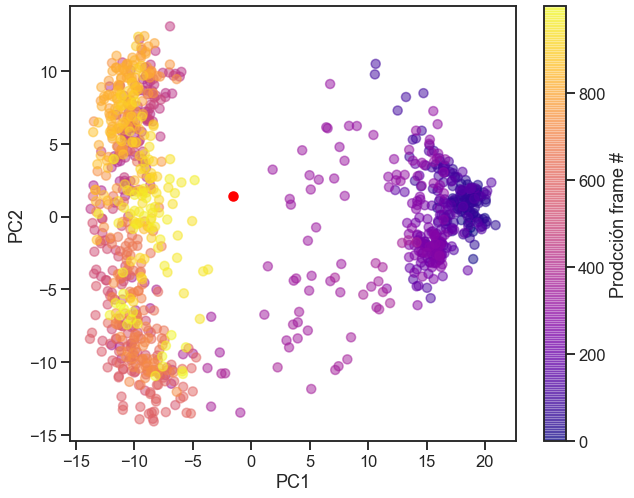

In [42]:
plt.figure(figsize= (10,8))
# Minimización, calentamiento y equilibrado
# Produccion
plt.scatter(pca_projection[0][-5000::5], pca_projection[1][-5000::5], marker='o', 
            c=range(traj_plus_cristal[-5000::5].n_frames), alpha=0.5, cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Prodcción frame #')
# Cristal
plt.scatter(pca_projection[0][-1], pca_projection[1][-1], marker='o', 
            color='red' )
plt.xlabel('PC1')
plt.ylabel('PC2')

<Universe with 304 atoms>

In [4]:
# notar que al archivo de trayectoria se 
# le ha removido el solvente para facilitar el analisis
traj = pyt.load(filename = './1L2Y/5-traj_analysis/tc5b_PROT_PROD.dcd',
                  top = './1L2Y/5-traj_analysis/1l2y_Hs.psf')
traj

pytraj.Trajectory, 5000 frames: 
Size: 0.033975 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [2]:
# Cargamos la restructura inicial
estruc_cristal = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.psf',
                             './1L2Y/5-traj_analysis/1l2y_Hs.pdb')
estruc_cristal

<Universe with 304 atoms>

In [6]:
traj = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.psf', 
                './1L2Y/5-traj_analysis/tc5b_PROT_PROD.dcd'
                  )
traj

<Universe with 304 atoms>

In [5]:
# Visualizacion de la trayectoria
nv.show_pytraj(traj)

NGLWidget(max_frame=4999)

In [7]:
nv.show_mdanalysis(traj)

/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/home/joel/anaconda3/envs/mds/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:902: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


NGLWidget(max_frame=4999)

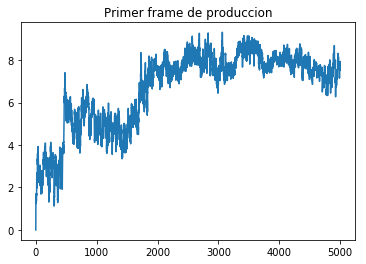

In [45]:
rmsd = pyt.rmsd(traj = traj, mask = '@CA')
plt.plot(rmsd); plt.title('Primer frame de produccion')
plt.show()

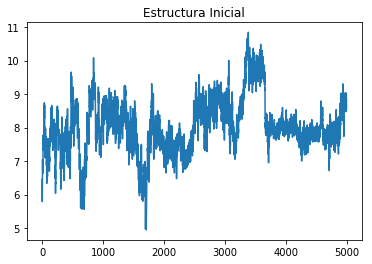

In [54]:
# RMSD comparado con la estructura inicial
rmsd = pyt.rmsd(traj = traj, mask = '@CA', ref = estruc_lineal)
plt.plot(rmsd); plt.title('Estructura Inicial')
plt.show()

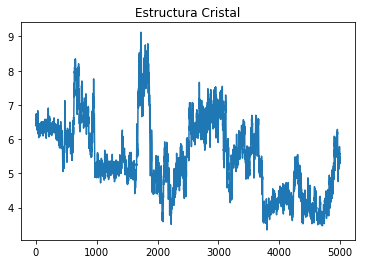

In [55]:
# RMSD comparado con la estructura inicial
rmsd = pyt.rmsd(traj = traj, mask = '@CA', ref = estruc_cristal)
plt.plot(rmsd); plt.title('Estructura Cristal')
plt.show()

In [57]:
y = nv.show_pytraj(estruc_lineal)
y

NGLWidget()

In [52]:
# Visualizacion de la esructura
w = nv.show_pytraj(estruc_cristal)
w

NGLWidget()

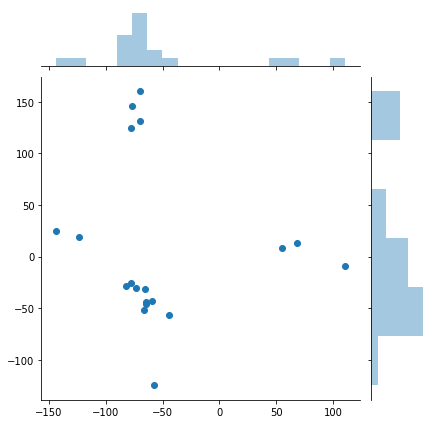

In [147]:
# Visualizacion de plots de ramachandran
# Cristal
angles = pyt.multidihedral(estruc_cristal, 'phi psi', resrange=range(20))

# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in angles if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in angles if 'psi' in d.key]).flatten()

sns.jointplot(phi, psi, kind='scatter', stat_func=None)
plt.show()

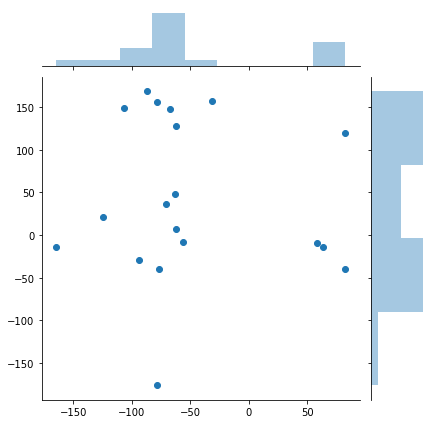

In [151]:
# Cristal
angles = pyt.multidihedral(traj[-2:-1], 'phi psi', resrange=range(20))

# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in angles if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in angles if 'psi' in d.key]).flatten()
sns.jointplot(phi, psi, kind='scatter', stat_func=None)
plt.show()

In [153]:
import MDAnalysis as mda
u = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.pdb')

# selection of atomgroups
ags = [res.phi_selection() for res in u.residues[4:9]]

from MDAnalysis.analysis.dihedrals import Dihedral
R = Dihedral(ags).run()

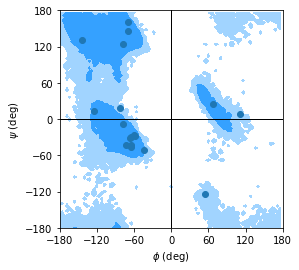

In [158]:
from MDAnalysis.analysis.dihedrals import Ramachandran

u = mda.Universe('./1L2Y/5-traj_analysis/1l2y_Hs.pdb')
r = u.select_atoms("resid 2-19")

R = Ramachandran(r).run()
fig, ax = plt.subplots(figsize = plt.figaspect(1))
R.plot(ref = True)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m

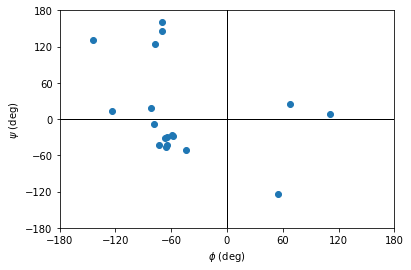

In [156]:
dir(R.plot())